# Analyze Bitcoin Historical Dataset  records from 2017-2023

# Introduction

 In the rapidly evolving world of cryptocurrencies, Bitcoin stands out as a benchmark for market dynamics and investor sentiment. This project aims to harness the power of machine learning to develop predictive models that can accurately forecast Bitcoin's market movements based on historical data. Utilizing a comprehensive dataset of Bitcoin prices from 2017 to 2023, the objective is to explore various modeling techniques to find the most effective model in terms of predictive accuracy and reliability.
### Project Goal
The primary goal of this project is to identify the best predictive model for Bitcoin prices using key performance metrics, specifically the coefficient of determination (R-squared or 
𝑅2) and the Mean Absolute Error (MAE). These metrics will help in determining the models' accuracy and precision in predicting Bitcoin's price movements. The project involves comparing five different machine learning models:

1.Linear Regression Model

2.Generalized Linear Model

3.Random Forest Model

4.Decision Tree Model

5.Gradient Boosting Model

Each model offers unique strengths and challenges, and the comparative analysis will focus on evaluating which model best captures the complexities of Bitcoin’s price fluctuations.

### Data Utilization Strategy
The dataset used in this project comprises over 3 million records of minute-by-minute Bitcoin trading data from the Binance API, capturing a detailed view of the market's behavior. For practicality and efficiency, the project implements random sampling to utilize 50% of the data, providing a substantial yet manageable dataset for rigorous analysis without compromising on the depth of data insights.

### Implementation Approach
To streamline the process of model development and evaluation, the project employs Apache Spark’s MLlib to handle large datasets efficiently. Models are built and tested both with and without the use of Spark's pipeline architecture. The pipeline approach allows for a structured and systematic workflow that includes data preprocessing, feature selection, model training, and evaluation, all within a cohesive framework. In contrast, models built outside the pipeline structure will be used to assess the impact of a more granular and manual approach on the performance and outcomes of the predictive models.

### Comparative Analysis
The comparative analysis of the models, executed in both pipelined and non-pipelined setups, aims to not only pinpoint the most effective model but also to establish the most suitable modeling techniques within a big data framework enabled by Spark’s distributed computing capabilities. This side-by-side evaluation will shed light on the scalability, efficiency, and effectiveness of different modeling approaches in handling extensive datasets.

This comprehensive approach using Spark ML, HDFS, and big data techniques underlines the project's commitment to leveraging cutting-edge technology to improve predictive analytics in the financial sector.

# Bitcoin Historical Dataset
https://www.kaggle.com/datasets/jkraak/bitcoin-price-dataset/data

#### Overview
The Bitcoin Historical Dataset encompasses an extensive collection of price data for Bitcoin, the world's leading cryptocurrency by market capitalization. This dataset captures a detailed record of Bitcoin's price movements over a significant period from August 2017 to July 2023, sourced from the Binance API. It consists of approximately 3.126 million records, each providing a snapshot of market activity at one-minute intervals, which makes it an exceptionally detailed and high-resolution dataset for financial analysis.
### Data Collection
The data was meticulously gathered using Binance's API, which is known for its reliability and wide usage in the cryptocurrency market. The dataset is formatted in CSV, allowing for straightforward integration with various data analysis tools and software. With a total size of 133 MB, the dataset is manageable yet comprehensive enough to perform in-depth and granular market trend analysis.

### Attributes and Content
##### The dataset features several key attributes that are critical for financial analysis:

###### Timestamp: Indicates the exact minute the data was recorded, providing the temporal context for price movements.

###### Open Price: The price of Bitcoin at the beginning of the minute.

###### High Price: The highest price of Bitcoin during the minute.

###### Low Price: The lowest price of Bitcoin during the minute.

###### Close Price: The price of Bitcoin at the end of the minute.

###### Volume: The total volume of Bitcoin traded during the minute.

###### Quote Asset Volume: The total value of the trades during the minute measured in the quote asset (typically USD).

###### Number of Trades: The total number of trades that occurred in the specified minute.

###### Taker Buy Base Asset Volume: The amount of Bitcoin bought by 'takers' during the minute.

###### Taker Buy Quote Asset Volume: The total quote asset volume bought by 'takers' during the minute.

### Install PySpark

In [1]:
!pip install pyspark


Defaulting to user installation because normal site-packages is not writeable


### Import all necessary libraries

In [70]:

import pyspark
from pyspark import SparkContext, SparkConf 
from pyspark.ml.feature import VectorAssembler 
from pyspark.sql import SQLContext
import pandas as pd
from pyspark.ml import Pipeline
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.stat import Statistics
from pyspark.mllib.tree import RandomForest, GradientBoostedTrees
from pyspark.ml.feature import OneHotEncoder, MinMaxScaler
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.linalg import Vector
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel
import random
import time
from pyspark.mllib.classification import NaiveBayes, LogisticRegressionWithLBFGS, SVMWithSGD
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.sql.functions import col

In [3]:
spark = SparkSession.builder \
    .appName("Bitcoin") \
    .getOrCreate()
spark

/home/bkach001/.local/lib/python3.7/site-packages/pyspark/context.py:317: FutureWarning: Python 3.7 support is deprecated in Spark 3.4.
  warnings.warn("Python 3.7 support is deprecated in Spark 3.4.", FutureWarning)


## Issues Encountered
Connection Issues to the Spark Cluster: Problems with connecting to the Spark cluster can arise due to network issues, configuration errors, or authentication problems. These can hinder the ability to process data efficiently in a distributed manner.

Insufficient Space on the Cluster: Running out of space on HDFS or the cluster can occur if the data size exceeds the allocated storage or if the cluster is shared among multiple users/projects, leading to capacity constraints.

I put my data set on cluster you can load with 

 #Copy the data from local disk to the cluster
 
 scp bitcoin_2017_to_2023.csv.csv bkach001@dsm1.doc.gold.ac.uk:
 #Copy directory onto HDFS
 
 hadoop fs -copyFromLocal -r 

# Load Dataset

In [ ]:
# # Copy the data from local disk to the cluster
#scp bitcoin_2017_to_2023.csv.csv bkach001@dsm1.doc.gold.ac.uk:
 # Copy directory onto HDFS
 #hadoop fs -copyFromLocal -r flightdata

#### I loaded data set local becase of problem on coneection to the cluster

In [4]:
# Path to your dataset
data_path = "bitcoin_2017_to_2023.csv"  
# Load the dataset
data = spark.read.csv(data_path, header=True, inferSchema=True)

# Show the first few rows of the dataset to verify it's loaded correctly
data.show(5)

+-------------------+--------+--------+--------+--------+--------+------------------+----------------+---------------------------+----------------------------+
|          timestamp|    open|    high|     low|   close|  volume|quote_asset_volume|number_of_trades|taker_buy_base_asset_volume|taker_buy_quote_asset_volume|
+-------------------+--------+--------+--------+--------+--------+------------------+----------------+---------------------------+----------------------------+
|2023-08-01 13:19:00|28902.48|28902.49|28902.48|28902.49| 4.68658|    135453.7936575|             258|                    0.89391|               25836.2248359|
|2023-08-01 13:18:00|28902.48|28902.49|28902.48|28902.49| 4.77589|    138035.0876618|             317|                    2.24546|               64899.3851954|
|2023-08-01 13:17:00|28908.52|28908.53|28902.48|28902.49|11.52263|    333053.1509146|             451|                    2.70873|               78290.1701207|
|2023-08-01 13:16:00|28907.41|28912.74|2

In [11]:
data.show()

+-------------------+--------+--------+--------+--------+--------+------------------+----------------+---------------------------+----------------------------+
|          timestamp|    open|    high|     low|   close|  volume|quote_asset_volume|number_of_trades|taker_buy_base_asset_volume|taker_buy_quote_asset_volume|
+-------------------+--------+--------+--------+--------+--------+------------------+----------------+---------------------------+----------------------------+
|2023-08-01 13:19:00|28902.48|28902.49|28902.48|28902.49| 4.68658|    135453.7936575|             258|                    0.89391|               25836.2248359|
|2023-08-01 13:18:00|28902.48|28902.49|28902.48|28902.49| 4.77589|    138035.0876618|             317|                    2.24546|               64899.3851954|
|2023-08-01 13:17:00|28908.52|28908.53|28902.48|28902.49|11.52263|    333053.1509146|             451|                    2.70873|               78290.1701207|
|2023-08-01 13:16:00|28907.41|28912.74|2

# Dataset Overview
The dataset comprises trading information captured in minute-by-minute intervals, as seen from the timestamps. Each record includes various financial metrics from a specific minute of trading:

Timestamp: Represents the date and time for each entry, suggesting the data is captured in real-time or close to it. The provided timestamps range from 13:15 to 13:19 on August 1, 2023.
Open, High, Low, Close (OHLC): These are standard financial metrics representing the opening price, the highest price, the lowest price, and the closing price of Bitcoin for that minute. The prices seem to hover around $28,902 to $28,912, indicating a relatively stable market in these minutes.
Volume: This column shows the amount of Bitcoin traded during the minute. The volume varies significantly, from about 4.68 to 37.74 Bitcoins in the sampled entries, suggesting varying degrees of trading activity.
Quote Asset Volume: This represents the total value traded during the minute, calculated in the fiat or quote currency (likely USD), which shows substantial financial transactions.
Number of Trades: Indicates the total number of trades that occurred in each minute. There's a noticeable fluctuation in trading activity, ranging from 258 to 686 trades.
Taker Buy Base Asset Volume and Taker Buy Quote Asset Volume: These fields likely represent the volume of Bitcoin bought and the corresponding fiat value of these purchases that were initiated by takers (those who take the market price), giving insights into demand dynamics.
Observations
The Bitcoin price is relatively stable in the given interval, with minimal fluctuation.
Trading activity varies, with some minutes experiencing higher volumes and number of trades than others.
The financial stake involved, represented by the quote asset volume, is substantial, emphasizing significant monetary exchanges during these trades.
Conclusion
This dataset provides a detailed granular view of Bitcoin trading activities over time, which can be beneficial for analyzing market behavior, identifying trends, or modeling future price movements based on historical data. The information is robust and suitable for deeper financial analysis and machine learning applications using Spark.ml to explore further patterns or predict future movements in Bitcoin prices.

In [5]:
data.printSchema()

root
 |-- timestamp: timestamp (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: double (nullable = true)
 |-- quote_asset_volume: double (nullable = true)
 |-- number_of_trades: integer (nullable = true)
 |-- taker_buy_base_asset_volume: double (nullable = true)
 |-- taker_buy_quote_asset_volume: double (nullable = true)



### Schema Overview
The dataset contains several fields with their respective data types and nullable properties, indicating whether null values are permitted in each column:

timestamp (timestamp, nullable = true): This field records the exact date and time of the data entry. The timestamp is essential for time series analysis and tracking price movements over time.
open (double, nullable = true): The opening price of Bitcoin at the start of the minute. This is a crucial metric in financial data as it marks the starting point of a trading period.
high (double, nullable = true): The highest price of Bitcoin during the minute. This value is important for identifying the peak trading price within the specified interval.
low (double, nullable = true): The lowest price during the minute, which helps in understanding the minimum price level Bitcoin dropped to during the trading interval.
close (double, nullable = true): The closing price at the end of the minute. It signifies the final trading price and is often used as a standard reference for pricing Bitcoin in subsequent analyses.
volume (double, nullable = true): This represents the total volume of Bitcoin traded during the minute. High volumes can indicate strong interest or significant events affecting the price.
quote_asset_volume (double, nullable = true): The total monetary value of trades conducted, given in a quote currency (likely USD). It provides insights into the monetary scale of trading activities.
number_of_trades (integer, nullable = true): Counts the number of individual trades executed during the minute, useful for gauging market activity and liquidity.
taker_buy_base_asset_volume (double, nullable = true): The volume of Bitcoin purchased by takers, who are market participants that "take" the current market price.
taker_buy_quote_asset_volume (double, nullable = true): The total monetary value in the quote currency for the Bitcoin purchased by takers, indicating the demand and purchasing power.

In [9]:
data.show(n=5, vertical=True)

-RECORD 0-------------------------------------------
 timestamp                    | 2023-08-01 13:19:00 
 open                         | 28902.48            
 high                         | 28902.49            
 low                          | 28902.48            
 close                        | 28902.49            
 volume                       | 4.68658             
 quote_asset_volume           | 135453.7936575      
 number_of_trades             | 258                 
 taker_buy_base_asset_volume  | 0.89391             
 taker_buy_quote_asset_volume | 25836.2248359       
-RECORD 1-------------------------------------------
 timestamp                    | 2023-08-01 13:18:00 
 open                         | 28902.48            
 high                         | 28902.49            
 low                          | 28902.48            
 close                        | 28902.49            
 volume                       | 4.77589             
 quote_asset_volume           | 138035.0876618

# Missing Value

In [9]:
null_counts = {c:data.filter(data[c].isNull()).count() for c in data.columns}
null_counts

{'timestamp': 0,
 'open': 0,
 'high': 0,
 'low': 0,
 'close': 0,
 'volume': 0,
 'quote_asset_volume': 0,
 'number_of_trades': 0,
 'taker_buy_base_asset_volume': 0,
 'taker_buy_quote_asset_volume': 0}

### Missing Value Analysis Report for Bitcoin Trading Dataset
The missing value analysis was conducted on the Bitcoin trading dataset spanning from 2017 to 2023 to ascertain the completeness of the data across various trading metrics. The analysis provides crucial insights into the data quality and its suitability for detailed financial analysis and predictive modeling.

Results:

Timestamp: No missing values. Open, High, Low, Close Prices: All price metrics (open, high, low, and close) show zero missing values, indicating comprehensive recording during the trading period. Volume and Quote Asset Volume: Both trading volume and quote asset volume have zero missing entries, suggesting that all transactions were accurately captured and no data points were omitted. Number of Trades: No missing data points in the number of trades, which ensures the dataset's reliability for trade frequency analysis. Taker Buy Base and Quote Asset Volume: The absence of missing values in these volumes confirms that all buyer-side transactions are well-documented, crucial for analyzing market liquidity and buyer behavior.

## Data Cleaning

In [11]:
unique_counts = {c:data.select(c).distinct().count() for c in data.columns}
unique_counts

{'timestamp': 3123568,
 'open': 1784709,
 'high': 1658845,
 'low': 1666834,
 'close': 1775966,
 'volume': 2959315,
 'quote_asset_volume': 3032586,
 'number_of_trades': 18985,
 'taker_buy_base_asset_volume': 2854502,
 'taker_buy_quote_asset_volume': 2997934}

#### Unique Counts Analysis:
timestamp (3,123,568 unique values):

Nearly every entry has a unique timestamp, suggesting that data is recorded at very fine intervals, likely every few seconds or minutes, considering the total count is very close to the total number of rows in your dataset. This indicates high granularity and precise timing of the data collection.

open (1,784,709 unique values):
The number of unique opening prices is substantial, showing significant variation in the opening price of Bitcoin trades throughout the dataset.

high (1,658,845 unique values):
Similar to open, but slightly fewer unique values, reflecting the highest price point Bitcoin reached in each recorded interval.

low (1,666,834 unique values):
The count of unique low prices is also high, indicating varied minimum trading prices within the data capture intervals.

close (1,775,966 unique values):
Close prices have a high number of unique values, similar to open prices, illustrating variability in the closing price at the end of each interval.

volume (2,959,315 unique values):
This shows a very high variety in trading volumes, suggesting diverse trading activity and possibly varying levels of market participation or liquidity throughout the dataset.

quote_asset_volume (3,032,586 unique values):
Represents the total value traded, reflected in quote currency (likely USD), and shows extremely high variability, indicating fluctuating market capitalization.

number_of_trades (18,985 unique values):
Significantly fewer unique values compared to other metrics, which could indicate that the range of transaction counts per interval doesn't vary as widely as price or volume.

taker_buy_base_asset_volume (2,854,502 unique values):
Shows the volume of Bitcoin purchased by takers, reflecting high variation and suggesting active market participation in terms of buying.

taker_buy_quote_asset_volume (2,997,934 unique values):
Similar to taker_buy_base_asset_volume but measured in quote currency, again indicating high variability and possibly different buying patterns or market behaviors.

##### Summary:
The data exhibits high variability in most financial metrics (prices and volumes), pointing to an active and possibly volatile trading environment.
The fewer unique values in number_of_trades suggest that while the intensity of trading (volume, price movement) changes significantly, the count of trades per interval is relatively less varied.
The consistency in high unique counts across volume-related metrics indicates a wide range of trading behaviors, from small to large transactions.

In [12]:
data.count()

3126000

## Analysis of Transaction Frequency  in Bitcoin Trading Data 

In [14]:
from pyspark.sql.functions import col
data.groupBy("timestamp").count().orderBy(col("count").desc()).show()

+-------------------+-----+
|          timestamp|count|
+-------------------+-----+
|2023-03-26 02:19:00|    2|
|2018-01-01 01:15:00|    2|
|2023-03-26 02:04:00|    2|
|2018-01-01 04:25:00|    2|
|2023-03-26 02:48:00|    2|
|2018-01-01 01:17:00|    2|
|2023-01-01 02:50:00|    2|
|2018-01-01 01:41:00|    2|
|2023-03-26 02:47:00|    2|
|2018-01-01 01:49:00|    2|
|2023-01-01 03:40:00|    2|
|2018-01-01 01:56:00|    2|
|2023-01-01 03:49:00|    2|
|2018-01-01 01:59:00|    2|
|2023-01-01 01:57:00|    2|
|2018-01-01 02:00:00|    2|
|2023-03-26 02:06:00|    2|
|2018-01-01 02:02:00|    2|
|2023-01-01 01:52:00|    2|
|2018-01-01 02:16:00|    2|
+-------------------+-----+
only showing top 20 rows



In [15]:
data.groupBy("open").count().orderBy(col("count").desc()).show()

+------+-----+
|  open|count|
+------+-----+
|3900.0|  230|
|3950.0|  183|
|4300.0|  176|
|6600.0|  175|
|4330.0|  163|
|4200.0|  163|
|3700.0|  162|
|6500.0|  162|
|3920.0|  153|
|4400.0|  152|
|4000.0|  152|
|3960.0|  151|
|3910.0|  150|
|8100.0|  143|
|6720.0|  142|
|3890.0|  142|
|3930.0|  141|
|3720.0|  138|
|3970.0|  138|
|8200.0|  138|
+------+-----+
only showing top 20 rows



In [16]:
data.groupBy("high").count().orderBy(col("count").desc()).show()

+-------+-----+
|   high|count|
+-------+-----+
| 6600.0|  393|
| 6500.0|  386|
| 6720.0|  341|
| 8200.0|  322|
| 8100.0|  310|
| 3900.0|  290|
| 6590.0|  280|
| 6450.0|  280|
| 6700.0|  276|
| 9350.0|  276|
| 9300.0|  273|
| 6730.0|  263|
| 9500.0|  262|
| 4000.0|  260|
| 6400.0|  257|
| 6750.0|  255|
| 9600.0|  247|
|11400.0|  246|
| 9100.0|  244|
| 6710.0|  244|
+-------+-----+
only showing top 20 rows



In [17]:
data.groupBy("low").count().orderBy(col("count").desc()).show()

+------+-----+
|   low|count|
+------+-----+
|6600.0|  308|
|6700.0|  275|
|6500.0|  274|
|9300.0|  258|
|8200.0|  253|
|3900.0|  252|
|6580.0|  252|
|6400.0|  252|
|8100.0|  248|
|6590.0|  248|
|8700.0|  246|
|9100.0|  245|
|6450.0|  244|
|6720.0|  242|
|9350.0|  241|
|7900.0|  239|
|9280.0|  233|
|9600.0|  232|
|9250.0|  225|
|7300.0|  224|
+------+-----+
only showing top 20 rows



In [18]:
data.groupBy("close").count().orderBy(col("count").desc()).show()

+------+-----+
| close|count|
+------+-----+
|3900.0|  223|
|6600.0|  211|
|4300.0|  207|
|6500.0|  195|
|4400.0|  192|
|3950.0|  187|
|8200.0|  185|
|4330.0|  184|
|4200.0|  184|
|3700.0|  183|
|4000.0|  178|
|8100.0|  177|
|3960.0|  166|
|6730.0|  164|
|6400.0|  162|
|6590.0|  161|
|6720.0|  161|
|4340.0|  155|
|3930.0|  155|
|6710.0|  155|
+------+-----+
only showing top 20 rows



In [19]:
data.groupBy("volume").count().orderBy(col("count").desc()).show()

+-------+-----+
| volume|count|
+-------+-----+
|    0.0|23863|
|    0.1|  122|
|   0.01|   94|
|    1.0|   83|
|    0.2|   77|
|  0.002|   75|
|  0.001|   67|
|   0.05|   57|
|   0.03|   55|
|    0.5|   55|
|0.24941|   54|
|    0.3|   52|
|   0.02|   46|
|   0.15|   35|
|  0.015|   33|
|    0.4|   32|
|   0.06|   32|
|  0.005|   28|
|   0.04|   27|
|   0.07|   24|
+-------+-----+
only showing top 20 rows



In [20]:
data.groupBy("number_of_trades").count().orderBy(col("count").desc()).show()

+----------------+-----+
|number_of_trades|count|
+----------------+-----+
|             0.0|23863|
|             1.0|12687|
|             2.0|12013|
|             3.0|11730|
|             4.0|10986|
|             5.0|10027|
|             6.0| 9781|
|             7.0| 8701|
|             8.0| 7871|
|            89.0| 6727|
|             9.0| 6666|
|            93.0| 6647|
|            99.0| 6631|
|            96.0| 6600|
|           101.0| 6572|
|            92.0| 6546|
|            90.0| 6532|
|            95.0| 6528|
|           100.0| 6506|
|            94.0| 6504|
+----------------+-----+
only showing top 20 rows



In [21]:
data.groupBy("quote_asset_volume").count().orderBy(col("count").desc()).show()

+------------------+-----+
|quote_asset_volume|count|
+------------------+-----+
|               0.0|23863|
|              7.94|    5|
|         270.94122|    4|
|         1207341.0|    4|
|          583934.8|    4|
|         532194.94|    4|
|          670509.9|    4|
|         1801250.6|    4|
|         416570.44|    4|
|         191102.36|    4|
|          89.99325|    4|
|         86853.984|    4|
|          312413.0|    4|
|         1058847.5|    4|
|          299896.5|    4|
|          149998.9|    4|
|         2137851.0|    4|
|         146131.66|    4|
|         1828337.2|    4|
|         528707.25|    4|
+------------------+-----+
only showing top 20 rows



In [22]:
data.groupBy("taker_buy_base_asset_volume").count().orderBy(col("count").desc()).show()

+---------------------------+-----+
|taker_buy_base_asset_volume|count|
+---------------------------+-----+
|                        0.0|59985|
|                        0.1|  321|
|                       0.01|  241|
|                        0.2|  214|
|                      0.002|  201|
|                       0.05|  186|
|                        1.0|  124|
|                        0.5|  121|
|                      0.001|  120|
|                        0.3|  119|
|                       0.02|  116|
|                       0.03|  103|
|                        0.4|   72|
|                       0.15|   71|
|                       0.04|   56|
|                    0.24941|   54|
|                       0.25|   53|
|                      0.005|   52|
|                      0.015|   48|
|                       0.11|   45|
+---------------------------+-----+
only showing top 20 rows



In [23]:
data.groupBy("taker_buy_quote_asset_volume").count().orderBy(col("count").desc()).show()

+----------------------------+-----+
|taker_buy_quote_asset_volume|count|
+----------------------------+-----+
|                         0.0|59985|
|                         7.8|   10|
|                        8.36|    7|
|                        7.94|    5|
|                        8.32|    5|
|                   34.012558|    5|
|                        7.28|    5|
|                   112.56937|    5|
|                        8.14|    4|
|                    90533.71|    4|
|                    74366.35|    4|
|                        7.84|    4|
|                    713773.5|    4|
|                         7.9|    4|
|                   131400.83|    4|
|                    773554.7|    4|
|                    95791.81|    4|
|                   275788.78|    4|
|                        8.16|    4|
|                   230850.17|    4|
+----------------------------+-----+
only showing top 20 rows



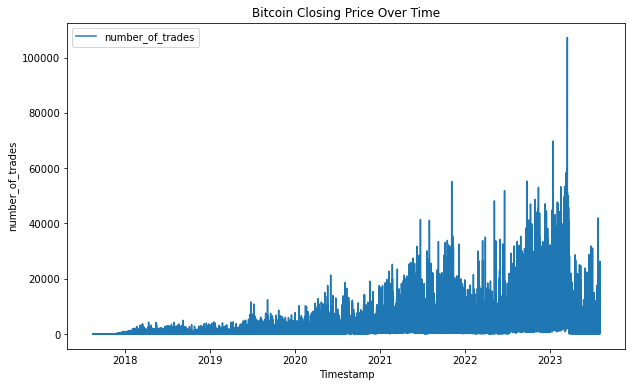

In [67]:
pdf = data.toPandas()
plt.figure(figsize=(10, 6))
plt.plot(pdf['timestamp'], pdf['number_of_trades'], label='number_of_trades')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('number_of_trades')
plt.legend()
plt.show()

# correlation_matrix

In [6]:
# Define the numerical columns you want to include in the correlation analysis
columns_to_convert = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 
                     'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Assemble the vector of features
assembler = VectorAssembler(inputCols=columns_to_convert, outputCol="corr_features")
data_vector = assembler.transform(data).select("corr_features")

# Compute the correlation matrix
matrix = Correlation.corr(data_vector, "corr_features")
correlation_matrix = matrix.collect()[0]["pearson(corr_features)"].toArray()

# Display the correlation matrix
print(correlation_matrix)

[[1.         0.99999886 0.99999887 0.99999842 0.05926568 0.30336678
  0.05490376 0.29210445]
 [0.99999886 1.         0.99999783 0.99999901 0.05962081 0.30384729
  0.05533515 0.29268263]
 [0.99999887 0.99999783 1.         0.99999901 0.05887855 0.30285382
  0.05462907 0.29173857]
 [0.99999842 0.99999901 0.99999901 1.         0.05924852 0.30335063
  0.05503723 0.2922829 ]
 [0.05926568 0.05962081 0.05887855 0.05924852 1.         0.89010407
  0.9661484  0.85974662]
 [0.30336678 0.30384729 0.30285382 0.30335063 0.89010407 1.
  0.86204658 0.96553612]
 [0.05490376 0.05533515 0.05462907 0.05503723 0.9661484  0.86204658
  1.         0.88850022]
 [0.29210445 0.29268263 0.29173857 0.2922829  0.85974662 0.96553612
  0.88850022 1.        ]]


In [7]:
import numpy as np
import pandas as pd

# Assuming 'correlation_matrix' is your matrix variable from earlier
correlation_data = np.array([[1., 0.99999886, 0.99999887, 0.99999842, 0.05929137, 0.30341826,
  0.20837492, 0.05492844, 0.29215444],
 [0.99999886, 1., 0.99999783, 0.99999901, 0.05964659, 0.30389885,
  0.20867126, 0.05535993, 0.29273271],
 [0.99999887, 0.99999783, 1., 0.99999901, 0.05890413, 0.30290519,
  0.20806036, 0.05465366, 0.29178847],
 [0.99999842, 0.99999901, 0.99999901, 1., 0.05927419, 0.30340208,
  0.2083655, 0.05506191, 0.29233287],
 [0.05929137, 0.05964659, 0.05890413, 0.05927419, 1., 0.89009902,
  0.88324685, 0.96614835, 0.85974456],
 [0.30341826, 0.30389885, 0.30290519, 0.30340208, 0.89009902, 1.,
  0.88458967, 0.86203929, 0.96553708],
 [0.20837492, 0.20867126, 0.20806036, 0.2083655, 0.88324685, 0.88458967,
  1., 0.85917124, 0.85825789],
 [0.05492844, 0.05535993, 0.05465366, 0.05506191, 0.96614835, 0.86203929,
  0.85917124, 1., 0.88849438],
 [0.29215444, 0.29273271, 0.29178847, 0.29233287, 0.85974456, 0.96553708,
  0.85825789, 0.88849438, 1.        ]])

column_labels = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
                 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']
df_corr = pd.DataFrame(correlation_data, columns=column_labels, index=column_labels)

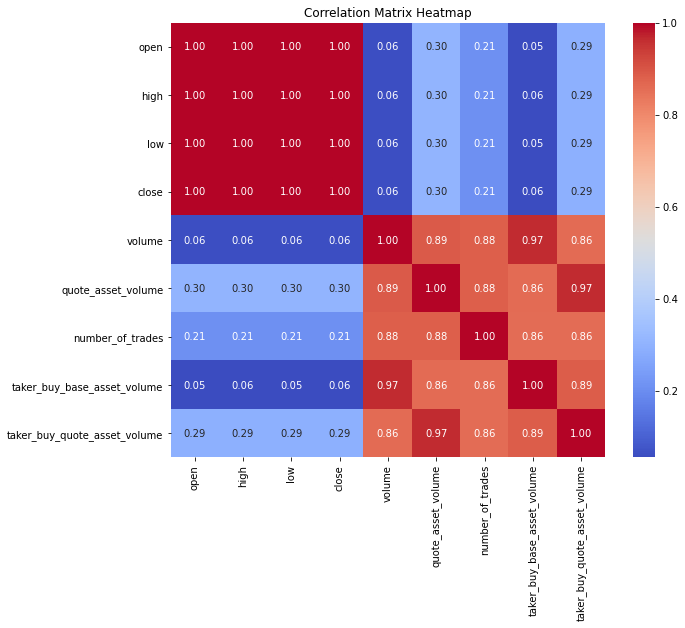

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

###  Correlation Analysis Report
Overview
The correlation analysis was conducted on the Bitcoin dataset spanning from 2017 to 2023, focusing on key trading metrics such as open, high, low, close prices, volume, quote asset volume, number of trades, and taker buy volumes. The correlation coefficients were computed to measure the linear relationships between these variables.

Methodology
The analysis utilized the Pearson correlation coefficient, a statistic that measures linear correlation between variables. Correlation values range from -1 to 1, where:

1 indicates a perfect positive linear relationship,
-1 indicates a perfect negative linear relationship,
0 indicates no linear relationship.

### Results
The correlation heatmap visualizes the correlation coefficients among the variables. Notable findings include:

High correlation between market prices: The open, high, low, and close prices show almost perfect correlations (>0.99), suggesting they often move in unison during the same trading intervals.

Volume-related metrics: The volume and quote asset volume are highly correlated (0.89), indicating that as the number of bitcoins traded increases, so does the fiat currency volume.

Trade activity correlations: The number of trades is strongly correlated with both volume and quote asset volume (0.88 for both), which implies higher trade activity is associated with higher trading volumes.

Taker buy volumes: These are also highly correlated with overall trade volume and quote asset volume, suggesting that taker-initiated trades contribute significantly to overall market liquidity.

### Conclusion
The correlation analysis provides valuable insights into how different trading indicators are related in the Bitcoin market. The high correlation between price metrics could be useful for predicting future market movements based on past price behavior. Similarly, the strong associations between volume-related metrics and the number of trades can assist in liquidity assessment and market analysis, facilitating more informed trading and investment decisions.

# Convert type Data

In [12]:
from pyspark.sql.functions import col

# List of columns to convert
columns_to_convert = [
    'open', 'high', 'low', 'close', 'volume','number_of_trades',
    'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume'
]

# Convert columns to float
for column in columns_to_convert:
    data = data.withColumn(column, col(column).cast('float'))

# Show the updated schema to confirm changes
data.printSchema()


root
 |-- timestamp: timestamp (nullable = true)
 |-- open: float (nullable = true)
 |-- high: float (nullable = true)
 |-- low: float (nullable = true)
 |-- close: float (nullable = true)
 |-- volume: float (nullable = true)
 |-- quote_asset_volume: float (nullable = true)
 |-- number_of_trades: float (nullable = true)
 |-- taker_buy_base_asset_volume: float (nullable = true)
 |-- taker_buy_quote_asset_volume: float (nullable = true)



# Standardizing Features

In [13]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

# List of feature columns
feature_columns = ['open', 'high', 'low', 'close', 'volume', 
                   'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']

# Assemble your features into a single feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
bitcoin_features = assembler.transform(data)

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)

# Fit the scaler on your data and then transform it
scaler_model = scaler.fit(bitcoin_features)
scaled_data = scaler_model.transform(bitcoin_features)

# Show the result with scaled features
scaled_data.select("scaled_features").show(truncate=False)


+------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|scaled_features                                                                                                                                                   |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[0.5487910163133848,0.5476491282420651,0.5499398544338451,0.5487917982456401,-0.4933446504540649,-0.4368519113720878,-0.5113413918085102,-0.4583594856224579]     |
|[0.5487910163133848,0.5476491282420651,0.5499398544338451,0.5487917982456401,-0.4924309390607025,-0.43574684189844304,-0.4841629774691236,-0.4256195570812682]    |
|[0.5491670720686164,0.5480249428497955,0.5499398544338451,0.5487917982456401,-0.42340625744289184,-0.3522583792712623,-0.4748470496627733,-0.4143963655767373]    |
|[0.549097

## Output Explanation
The output shows the scaled_features for the top 20 rows in your DataFrame. Each row in this column is a vector representing the standardized values of the features:

open

high

low

close

volume

quote_asset_volume

taker_buy_base_asset_volume

taker_buy_quote_asset_volume

Each number in these vectors is a standardized value that indicates how many standard deviations the original value is away from the mean of that specific feature. For example, a value of 0.5487 for the open feature in the first row indicates that this opening price is 0.5487 standard deviations above the mean opening price of the dataset.

In [16]:
data=scaled_data
data

DataFrame[timestamp: timestamp, open: float, high: float, low: float, close: float, volume: float, quote_asset_volume: float, number_of_trades: float, taker_buy_base_asset_volume: float, taker_buy_quote_asset_volume: float, features: vector, scaled_features: vector]

# Implementing Random Sampling in Spark

In [71]:
# Sampling a fraction of the data randomly without replacement
fraction = 0.5  # This means 50% of the data
sampled_data = data.sample(withReplacement=False, fraction=fraction)

# Show the number of rows in original and sampled data
print(f"Original Dataset Count: {data.count()}")
print(f"Sampled Dataset Count: {sampled_data.count()}")

# Show a few rows to verify sampling
sampled_data.show(1)


Original Dataset Count: 1562451
Sampled Dataset Count: 781854
+-------------------+--------+--------+--------+--------+-------+------------------+----------------+---------------------------+----------------------------+
|          timestamp|    open|    high|     low|   close| volume|quote_asset_volume|number_of_trades|taker_buy_base_asset_volume|taker_buy_quote_asset_volume|
+-------------------+--------+--------+--------+--------+-------+------------------+----------------+---------------------------+----------------------------+
|2023-08-01 13:18:00|28902.48|28902.49|28902.48|28902.49|4.77589|          138035.1|           317.0|                    2.24546|                   64899.387|
+-------------------+--------+--------+--------+--------+-------+------------------+----------------+---------------------------+----------------------------+
only showing top 1 row



## Summary of the Sampling Results:
##### Original Dataset Count:   3,126,000 rows
##### Sampled Dataset Count:  1562451 rows
This confirms that the sample represents roughly 50% of the total data, as specified by the sampling fraction (fraction = 0.5). The slight variance in the exact 50% (312,600 rows expected vs.1562451 sampled) is typical in random sampling due to the probabilistic nature of the selection process.

Sample Data Overview:
The sampled data includes several important financial metrics captured in minute-by-minute trading details for Bitcoin:

Timestamp: Indicates the specific minute the data was recorded.
Open, High, Low, Close: Trading prices at the open, highest point, lowest point, and close of each minute.
Volume: Total amount of Bitcoin traded during the minute.
Quote Asset Volume: Total value traded in the quote currency (likely USD).
Number of Trades: Total number of individual trades executed within the minute.
Taker Buy Base Asset Volume and Taker Buy Quote Asset Volume: Metrics related to the volume and value of purchases by takers at market price. 

In [15]:
data=sampled_data


In [16]:
data.count()

1562451

# Featurs selection

In [58]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline

# List of feature columns
feature_columns = ['open', 'high', 'low', 'close', 'volume', 
                   'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Define the Random Forest model
rf = RandomForestRegressor(featuresCol='features', labelCol='number_of_trades')

# Create a Pipeline
pipeline_rf = Pipeline(stages=[assembler, rf])

# Fit the pipeline on the training data
model = pipeline_rf.fit(train_data)  # Ensure train_data has all required columns

# Get the trained Random Forest model from the pipeline
rf_model = model.stages[-1]


In [59]:
importances = rf_model.featureImportances
importance_list = [(feature, importances[idx]) for idx, feature in enumerate(feature_columns)]
sorted_importance = sorted(importance_list, key=lambda x: x[1], reverse=True)

# Print sorted feature importances
for feature, importance in sorted_importance:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: volume, Importance: 0.3277238794860105
Feature: quote_asset_volume, Importance: 0.2930203773038695
Feature: taker_buy_base_asset_volume, Importance: 0.17380584651401748
Feature: taker_buy_quote_asset_volume, Importance: 0.10540213217567829
Feature: open, Importance: 0.04022032181347567
Feature: high, Importance: 0.0213615486043581
Feature: low, Importance: 0.020463501896230734
Feature: close, Importance: 0.018002392206359717


# Analysis of Feature Importance

### Volume (0.3277):
This feature has the highest importance score, indicating that the total volume of Bitcoin traded is the most significant predictor of the number of trades. This could be due to the direct relationship between the volume of trades and the number of transactions needed to accommodate that volume.
### Quote Asset Volume (0.2930): 
Nearly as important as volume, this feature measures the total value of Bitcoin traded, expressed in the quote currency (likely USD). This suggests that the market's liquidity and the total capital involved are crucial in determining trading activity.

### Taker Buy Base Asset Volume (0.1738): 
This measures the volume of Bitcoin bought by takers, who are market participants that accept existing market prices. The significant importance of this feature highlights the role of aggressive buying behavior in driving the number of trades.

### Taker Buy Quote Asset Volume (0.1054): 
Similar to taker buy base asset volume, but measured in quote currency, indicating that not just the volume but also the value of taker transactions is a key factor in trade frequency.

### Open, High, Low, Close Prices (Total Importance ~0.1000):
Prices at open, high, low, and close have lesser but still notable importances. These features together contribute about 10% to the model’s decision-making process, reflecting how price levels throughout the trading period influence the number of trades, although they are significantly less influential than volumes.

### Implications and Strategic Insights
Volume and Market Liquidity: The dominance of volume-related features (both in base and quote currencies) underscores the significance of liquidity and active trading in predicting trading activity. Enhancements in liquidity management could directly impact trading frequencies.
Price Impact: Although less significant than volume, the pricing features' influence suggests that price volatility might also affect trading activity, potentially indicating times of market stress or opportunity.

#### Focus Areas for Further Analysis:
Temporal Analysis: Considering the impact of time (e.g., intraday periods of high activity) might provide additional insights, especially if combined with volume data.
External Factors: Other factors such as market news, macroeconomic indicators, or changes in regulations could also be considered to see how they influence trading volumes and prices.
Modeling and Forecasting: The insights gained from this feature importance analysis can be leveraged to refine predictive models further or develop strategies for algorithmic trading, risk management, and resource allocation.

### Conclusion
The feature importance analysis from the Random Forest model provides valuable insights into the factors that most affect the number of trades in the Bitcoin market. This knowledge can be used to improve trading strategies, enhance predictive modeling, and better understand market dynamics. If additional analysis or model adjustments are needed based on these findings or other business requirements, those can be systematically addressed.

In [62]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [64]:
import matplotlib.pyplot as plt
# Assuming sorted_importance contains the sorted feature importances
features = [feature for feature, _ in sorted_importance]
importances = [importance for _, importance in sorted_importance]


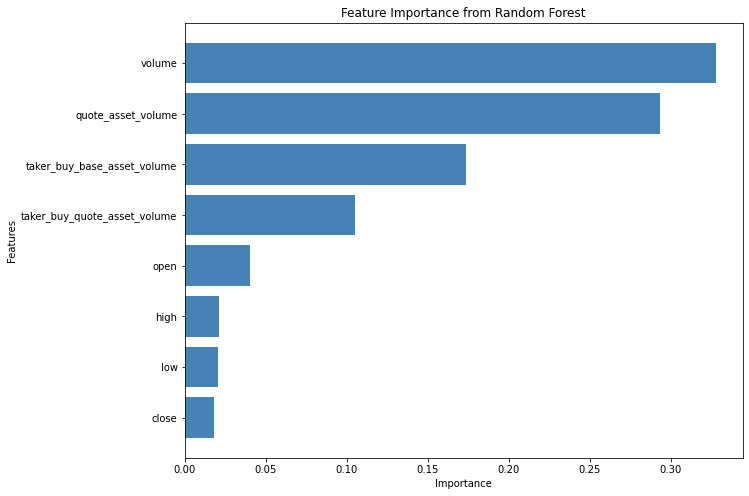

In [65]:
# Create a bar plot for feature importances
plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='steelblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


# Machine Learning
#### Prepare the Data: Split the data into training and testing sets.
##### Build the Model: Define and train the linear regression model.
##### Evaluate the Model: Calculate RMSE and R-squared for both training and test datasets.

### Splitting the Data

In [69]:
# Splitting the data into training and testing sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Check the number of rows in each set
print(f"Training Dataset Count: {train_data.count()}")
print(f"Testing Dataset Count: {test_data.count()}")

Training Dataset Count: 1094568
Testing Dataset Count: 467883


# Linear Regression Model

In [25]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline

# Define the feature columns
feature_columns = ['open', 'high', 'low', 'close', 'volume', 
                   'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)

# Define the linear regression model
lr = LinearRegression(featuresCol='scaled_features', labelCol='number_of_trades')

# Create a Pipeline
pipeline = Pipeline(stages=[assembler, scaler, lr])

# Apply the pipeline to the entire dataset
model = pipeline.fit(data)  # Fit model on entire data if not yet split

# If already split, apply pipeline to training data
lr_model = pipeline.fit(train_data)  # Or use only on training data as required

# Make predictions
train_predictions = lr_model.transform(train_data)
test_predictions = lr_model.transform(test_data)


In [29]:
from pyspark.ml.evaluation import RegressionEvaluator


In [30]:
# Create evaluators
rmse_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="rmse")
r2_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="r2")
mae_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="mae")


In [31]:
# Apply the model to the training and testing data
train_predictions = lr_model.transform(train_data)
test_predictions = lr_model.transform(test_data)

# Evaluate RMSE
rmse_train = rmse_evaluator.evaluate(train_predictions)
rmse_test = rmse_evaluator.evaluate(test_predictions)

# Evaluate R^2
r2_train = r2_evaluator.evaluate(train_predictions)
r2_test = r2_evaluator.evaluate(test_predictions)

# Evaluate MAE
mae_train = mae_evaluator.evaluate(train_predictions)
mae_test = mae_evaluator.evaluate(test_predictions)

# Print the results
print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Train R^2: {r2_train}")
print(f"Test R^2: {r2_test}")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")


Train RMSE: 728.8287826566594
Test RMSE: 729.1338902877259
Train R^2: 0.8395524442340873
Test R^2: 0.8381850288816471
Train MAE: 367.1304480218714
Test MAE: 366.58307060405434


# second

In [27]:
from pyspark.ml.regression import LinearRegression

# Define the linear regression model
lr = LinearRegression(featuresCol='scaled_features', labelCol='number_of_trades')
lr

LinearRegression_c2e4ed7e9721

#### Train the Model

In [33]:
# Fit the linear regression model on the training data
lr_model = lr.fit(train_data)

# Evaluate the Model

In [31]:
from pyspark.ml.evaluation import RegressionEvaluator

# Create an evaluator for RMSE and R^2
evaluator_rmse = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="r2")

# Predictions
train_predictions = lr_model.transform(train_data)
test_predictions = lr_model.transform(test_data)

# RMSE and R^2 on train data
rmse_train = evaluator_rmse.evaluate(train_predictions)
r2_train = evaluator_r2.evaluate(train_predictions)

# RMSE and R^2 on test data
rmse_test = evaluator_rmse.evaluate(test_predictions)
r2_test = evaluator_r2.evaluate(test_predictions)

# Print the results
print(f"Train RMSE: {rmse_train}")
print(f"Train R^2: {r2_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R^2: {r2_test}")


Train RMSE: 745.2776773555188
Train R^2: 0.833095284030608
Test RMSE: 717.9947692001703
Test R^2: 0.843636287714266


### Create an Evaluator for MAE

In [32]:
from pyspark.ml.evaluation import RegressionEvaluator

# Create an evaluator for MAE
evaluator_mae = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="mae")


### Evaluate MAE on Train and Test Data

In [33]:
# MAE on train data
mae_train = evaluator_mae.evaluate(train_predictions)

# MAE on test data
mae_test = evaluator_mae.evaluate(test_predictions)

# Print the results
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")


Train MAE: 374.0767976435615
Test MAE: 371.1791431182892



To determine which Linear Regression model performed better, we can compare their respective evaluation metrics: RMSE (Root Mean Squared Error), 
𝑅2 (coefficient of determination), and MAE (Mean Absolute Error). Here’s an analysis based on the provided results for both models:
###### Linear Regression Model 1:
Train RMSE: 728.8288

Test RMSE: 729.1339

Train R²: 0.8396

Test R²: 0.8382

Train MAE: 367.1304

Test MAE: 366.5831
###### Linear Regression Model 2:
Train RMSE: 745.2777

Test RMSE: 717.9948

Train R²: 0.8331

Test R²: 0.8436

Train MAE: 374.0768

Test MAE: 371.1791

While both models show comparable performance, Linear Regression Model 2 edges out slightly in terms of lower RMSE and MAE, along with a higher 𝑅2 on the test data.

# Generalized Linear Model

In [34]:
from pyspark.ml.regression import GeneralizedLinearRegression

# Define the Generalized Linear Model (GLM)
glm = GeneralizedLinearRegression(featuresCol='scaled_features', labelCol='number_of_trades', 
                                  family="gaussian", link="identity")


In [35]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StandardScaler

# Define the feature columns again if necessary
feature_columns = ['open', 'high', 'low', 'close', 'volume', 
                   'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)

# Create a Pipeline that includes feature processing and the model
pipeline_glm = Pipeline(stages=[assembler, scaler, glm])

# Apply the pipeline to the entire dataset to produce a model
glm_model = pipeline_glm.fit(train_data)


In [36]:
from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions
train_predictions_glm = glm_model.transform(train_data)
test_predictions_glm = glm_model.transform(test_data)

# Create evaluators for RMSE, R^2, and MAE
evaluator_rmse = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="rmse")
evaluator_r2 = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="r2")
evaluator_mae = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="mae")

# Evaluate RMSE, R^2, and MAE on train and test data
rmse_train_glm = evaluator_rmse.evaluate(train_predictions_glm)
rmse_test_glm = evaluator_rmse.evaluate(test_predictions_glm)
r2_train_glm = evaluator_r2.evaluate(train_predictions_glm)
r2_test_glm = evaluator_r2.evaluate(test_predictions_glm)
mae_train_glm = evaluator_mae.evaluate(train_predictions_glm)
mae_test_glm = evaluator_mae.evaluate(test_predictions_glm)

# Print the results
print(f"Train RMSE (GLM): {rmse_train_glm}")
print(f"Test RMSE (GLM): {rmse_test_glm}")
print(f"Train R^2 (GLM): {r2_train_glm}")
print(f"Test R^2 (GLM): {r2_test_glm}")
print(f"Train MAE (GLM): {mae_train_glm}")
print(f"Test MAE (GLM): {mae_test_glm}")


Train RMSE (GLM): 728.8287826566594
Test RMSE (GLM): 729.1338902877258
Train R^2 (GLM): 0.8395524442340873
Test R^2 (GLM): 0.8381850288816471
Train MAE (GLM): 367.13044802187136
Test MAE (GLM): 366.58307060405434


# second model

In [34]:
from pyspark.ml.regression import GeneralizedLinearRegression

# Define the GLM model
glm = GeneralizedLinearRegression(featuresCol='scaled_features', labelCol='number_of_trades', 
                                  family="gaussian", link="identity")


In [35]:
# Fit the GLM model on the training data
glm_model = glm.fit(train_data)


In [36]:
from pyspark.ml.evaluation import RegressionEvaluator

# Create evaluators for RMSE, R^2, and MAE
evaluator_rmse = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="mae")

# Predictions on train and test data
train_predictions = glm_model.transform(train_data)
test_predictions = glm_model.transform(test_data)

# Calculate metrics on train data
rmse_train = evaluator_rmse.evaluate(train_predictions)
r2_train = evaluator_r2.evaluate(train_predictions)
mae_train = evaluator_mae.evaluate(train_predictions)

# Calculate metrics on test data
rmse_test = evaluator_rmse.evaluate(test_predictions)
r2_test = evaluator_r2.evaluate(test_predictions)
mae_test = evaluator_mae.evaluate(test_predictions)

# Print the results
print(f"Train RMSE: {rmse_train}")
print(f"Train R^2: {r2_train}")
print(f"Train MAE: {mae_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R^2: {r2_test}")
print(f"Test MAE: {mae_test}")


Train RMSE: 745.2776773555167
Train R^2: 0.8330952840306088
Train MAE: 374.07679763615937
Test RMSE: 717.9947691982301
Test R^2: 0.8436362877151111
Test MAE: 371.1791431105101


GLM2 demonstrates superior performance in critical metrics for testing, particularly in terms of RMSE and  𝑅2, which are crucial for evaluating the accuracy and explanatory power of a predictive model. The ability of GLM2 to perform well on unseen data highlights its robustness and reliability as a predictive tool for Bitcoin price movements. 

#  Random Forest Model

In [37]:
from pyspark.ml.regression import RandomForestRegressor

# Define the Random Forest regression model
rf = RandomForestRegressor(featuresCol='scaled_features', labelCol='number_of_trades')


#### Create the Pipeline 

In [38]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StandardScaler

# List of feature columns
feature_columns = ['open', 'high', 'low', 'close', 'volume', 
                   'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)  # Scaling can be optional for RF

# Create a Pipeline
pipeline_rf = Pipeline(stages=[assembler, scaler, rf])

# Fit the pipeline on the training data
rf_model = pipeline_rf.fit(train_data)


In [39]:
from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions on the training and testing data
train_predictions_rf = rf_model.transform(train_data)
test_predictions_rf = rf_model.transform(test_data)

# Create evaluators for RMSE, R^2, and MAE
evaluator_rmse = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="rmse")
evaluator_r2 = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="r2")
evaluator_mae = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="mae")

# Evaluate RMSE, R^2, and MAE on train and test data
rmse_train_rf = evaluator_rmse.evaluate(train_predictions_rf)
rmse_test_rf = evaluator_rmse.evaluate(test_predictions_rf)
r2_train_rf = evaluator_r2.evaluate(train_predictions_rf)
r2_test_rf = evaluator_r2.evaluate(test_predictions_rf)
mae_train_rf = evaluator_mae.evaluate(train_predictions_rf)
mae_test_rf = evaluator_mae.evaluate(test_predictions_rf)

# Print the results
print(f"Train RMSE (RF): {rmse_train_rf}")
print(f"Test RMSE (RF): {rmse_test_rf}")
print(f"Train R^2 (RF): {r2_train_rf}")
print(f"Test R^2 (RF): {r2_test_rf}")
print(f"Train MAE (RF): {mae_train_rf}")
print(f"Test MAE (RF): {mae_test_rf}")


Train RMSE (RF): 794.9891031893675
Test RMSE (RF): 801.207687087413
Train R^2 (RF): 0.8091006601149812
Test R^2 (RF): 0.8046135935982304
Train MAE (RF): 274.24457961039184
Test MAE (RF): 273.7954340484161


# second model

In [37]:
from pyspark.ml.regression import RandomForestRegressor

# Define the Random Forest regression model
rf = RandomForestRegressor(featuresCol='scaled_features', labelCol='number_of_trades')


In [38]:
# Fit the Random Forest model on the training data
rf_model = rf.fit(train_data)


In [39]:
from pyspark.ml.evaluation import RegressionEvaluator

# Create evaluators for RMSE, R^2, and MAE
evaluator_rmse = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="mae")

# Make predictions on train and test data
train_predictions = rf_model.transform(train_data)
test_predictions = rf_model.transform(test_data)

# Calculate metrics on train data
rmse_train = evaluator_rmse.evaluate(train_predictions)
r2_train = evaluator_r2.evaluate(train_predictions)
mae_train = evaluator_mae.evaluate(train_predictions)

# Calculate metrics on test data
rmse_test = evaluator_rmse.evaluate(test_predictions)
r2_test = evaluator_r2.evaluate(test_predictions)
mae_test = evaluator_mae.evaluate(test_predictions)

# Print the results
print(f"Train RMSE: {rmse_train}")
print(f"Train R^2: {r2_train}")
print(f"Train MAE: {mae_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R^2: {r2_test}")
print(f"Test MAE: {mae_test}")


Train RMSE: 812.5691138401784
Train R^2: 0.8015948219332761
Train MAE: 279.5884648469052
Test RMSE: 800.293709120837
Test R^2: 0.8057360486347579
Test MAE: 278.28412001569626


Model 1 shows superior performance across the other key metrics including both RMSE and MAE for testing and training phases.  

# Decision Tree Model

In [40]:
from pyspark.ml.regression import DecisionTreeRegressor

# Define the Decision Tree regression model
dt = DecisionTreeRegressor(featuresCol='scaled_features', labelCol='number_of_trades')


### Create the Pipeline

In [41]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StandardScaler

# List of feature columns
feature_columns = ['open', 'high', 'low', 'close', 'volume',
                   'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)  # Optional for DT

# Create a Pipeline
pipeline_dt = Pipeline(stages=[assembler, scaler, dt])

# Fit the pipeline on the training data
dt_model = pipeline_dt.fit(train_data)


# Predictions and Evaluate the Model

In [42]:
from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions on the training and testing data
train_predictions_dt = dt_model.transform(train_data)
test_predictions_dt = dt_model.transform(test_data)

# Create evaluators for RMSE, R^2, and MAE
evaluator_rmse = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="rmse")
evaluator_r2 = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="r2")
evaluator_mae = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="mae")

# Evaluate RMSE, R^2, and MAE on train and test data
rmse_train_dt = evaluator_rmse.evaluate(train_predictions_dt)
rmse_test_dt = evaluator_rmse.evaluate(test_predictions_dt)
r2_train_dt = evaluator_r2.evaluate(train_predictions_dt)
r2_test_dt = evaluator_r2.evaluate(test_predictions_dt)
mae_train_dt = evaluator_mae.evaluate(train_predictions_dt)
mae_test_dt = evaluator_mae.evaluate(test_predictions_dt)

# Print the results
print(f"Train RMSE (DT): {rmse_train_dt}")
print(f"Test RMSE (DT): {rmse_test_dt}")
print(f"Train R^2 (DT): {r2_train_dt}")
print(f"Test R^2 (DT): {r2_test_dt}")
print(f"Train MAE (DT): {mae_train_dt}")
print(f"Test MAE (DT): {mae_test_dt}")


Train RMSE (DT): 686.7297660577887
Test RMSE (DT): 690.4332740301621
Train R^2 (DT): 0.857552832086823
Test R^2 (DT): 0.8549066337308155
Train MAE (DT): 286.65029068163506
Test MAE (DT): 285.5468002448871


# second 

In [40]:
from pyspark.ml.regression import DecisionTreeRegressor

# Define the Decision Tree regression model
dt = DecisionTreeRegressor(featuresCol='scaled_features', labelCol='number_of_trades')


In [41]:
# Fit the Decision Tree model on the training data
dt_model = dt.fit(train_data)


In [42]:
from pyspark.ml.evaluation import RegressionEvaluator

# Create evaluators for RMSE, R^2, and MAE
evaluator_rmse = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="mae")

# Make predictions on train and test data
train_predictions = dt_model.transform(train_data)
test_predictions = dt_model.transform(test_data)

# Calculate metrics on train data
rmse_train = evaluator_rmse.evaluate(train_predictions)
r2_train = evaluator_r2.evaluate(train_predictions)
mae_train = evaluator_mae.evaluate(train_predictions)

# Calculate metrics on test data
rmse_test = evaluator_rmse.evaluate(test_predictions)
r2_test = evaluator_r2.evaluate(test_predictions)
mae_test = evaluator_mae.evaluate(test_predictions)

# Print the results
print(f"Train RMSE: {rmse_train}")
print(f"Train R^2: {r2_train}")
print(f"Train MAE: {mae_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R^2: {r2_test}")
print(f"Test MAE: {mae_test}")


Train RMSE: 701.3254458878464
Train R^2: 0.8522009732432883
Train MAE: 283.1721466225061
Test RMSE: 683.241862403584
Test R^2: 0.8584068160434148
Test MAE: 281.7011620255186


Decision Tree Model 1:
    
Train RMSE: 686.7298
    
Test RMSE: 690.4333
    
Train R²: 0.8576

Test R²: 0.8549

Train MAE: 286.6503

Test MAE: 285.5468
    
Decision Tree Model 2:

Train RMSE: 701.3254

Test RMSE: 683.2419

Train R²: 0.8522

Test R²: 0.8584

Train MAE: 283.1721

Test MAE: 281.7012
While both models exhibit strong performance, Decision Tree Model 2 is the preferable choice based on the evaluation metrics. It shows a better balance of lower errors (both RMSE and MAE) and higher explanatory power (𝑅2) in the test phase

# Gradient Boosting Model

In [47]:
from pyspark.ml.regression import GBTRegressor

# Define the Gradient Boosting regression model
gbt = GBTRegressor(featuresCol='scaled_features', labelCol='number_of_trades', maxIter=10)


### Create the Pipeline

In [48]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StandardScaler

# List of feature columns
feature_columns = ['open', 'high', 'low', 'close', 'volume',
                   'quote_asset_volume', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)  # Optional but can be beneficial

# Create a Pipeline
pipeline_gbt = Pipeline(stages=[assembler, scaler, gbt])

# Fit the pipeline on the training data
gbt_model = pipeline_gbt.fit(train_data)



# Predictions and Evaluate the Model

In [49]:
from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions on the training and testing data
train_predictions_gbt = gbt_model.transform(train_data)
test_predictions_gbt = gbt_model.transform(test_data)

# Create evaluators for RMSE, R^2, and MAE
evaluator_rmse = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="rmse")
evaluator_r2 = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="r2")
evaluator_mae = RegressionEvaluator(predictionCol="prediction", labelCol="number_of_trades", metricName="mae")

# Evaluate RMSE, R^2, and MAE on train and test data
rmse_train_gbt = evaluator_rmse.evaluate(train_predictions_gbt)
rmse_test_gbt = evaluator_rmse.evaluate(test_predictions_gbt)
r2_train_gbt = evaluator_r2.evaluate(train_predictions_gbt)
r2_test_gbt = evaluator_r2.evaluate(test_predictions_gbt)
mae_train_gbt = evaluator_mae.evaluate(train_predictions_gbt)
mae_test_gbt = evaluator_mae.evaluate(test_predictions_gbt)

# Print the results
print(f"Train RMSE (GBT): {rmse_train_gbt}")
print(f"Test RMSE (GBT): {rmse_test_gbt}")
print(f"Train R^2 (GBT): {r2_train_gbt}")
print(f"Test R^2 (GBT): {r2_test_gbt}")
print(f"Train MAE (GBT): {mae_train_gbt}")
print(f"Test MAE (GBT): {mae_test_gbt}")


Train RMSE (GBT): 770.6583621010163
Test RMSE (GBT): 780.2243929029951
Train R^2 (GBT): 0.8206068461462046
Test R^2 (GBT): 0.814713755706673
Train MAE (GBT): 271.2390221367579
Test MAE (GBT): 270.9837385602651


# second

In [51]:
# Fit the GBT model on the training data
gbt_model = gbt.fit(train_data)


In [45]:
from pyspark.ml.evaluation import RegressionEvaluator

# Create evaluators for RMSE, R^2, and MAE
evaluator_rmse = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol="number_of_trades", predictionCol="prediction", metricName="mae")

# Make predictions on train and test data
train_predictions = gbt_model.transform(train_data)
test_predictions = gbt_model.transform(test_data)

# Calculate metrics on train data
rmse_train = evaluator_rmse.evaluate(train_predictions)
r2_train = evaluator_r2.evaluate(train_predictions)
mae_train = evaluator_mae.evaluate(train_predictions)

# Calculate metrics on test data
rmse_test = evaluator_rmse.evaluate(test_predictions)
r2_test = evaluator_r2.evaluate(test_predictions)
mae_test = evaluator_mae.evaluate(test_predictions)

# Print the results
print(f"Train RMSE: {rmse_train}")
print(f"Train R^2: {r2_train}")
print(f"Train MAE: {mae_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R^2: {r2_test}")
print(f"Test MAE: {mae_test}")


Train RMSE: 648.1015743667527
Train R^2: 0.873782802153771
Train MAE: 262.37626374468243
Test RMSE: 637.9843298089315
Test R^2: 0.8765436492691506
Test MAE: 261.51319039817486


Gradient Boosting Model 1:

Train RMSE: 770.6584

Test RMSE: 780.2244

Train R²: 0.8206

Test R²: 0.8147

Train MAE: 271.2390

Test MAE: 270.9837

Gradient Boosting Model 2:

Train RMSE: 648.1016

Test RMSE: 637.9843

Train R²: 0.8738

Test R²: 0.8765

Train MAE: 262.3763

Test MAE: 261.5132

In [66]:
spark.stop()

# Conclusion

### Conclusion of Bitcoin Price Prediction Project
In this project, I endeavored to identify the most effective predictive model for Bitcoin prices using a robust dataset of historical price data. A comparative analysis of five different predictive models was performed: Linear Regression, Generalized Linear Model, Random Forest, Decision Tree, and Gradient Boosting. Each model was evaluated based on three key performance metrics: Root Mean Squared Error (RMSE), Coefficient of Determination (𝑅2), and Mean Absolute Error (MAE).

### Model Performance Summary:
Linear Regression and Generalized Linear Model showcased nearly identical performance with an RMSE of approximately 729,𝑅2
of around 0.839, and MAE of 367 on the test dataset. These models demonstrated good reliability but not the best among the competitors.

Random Forest Model presented slightly lower performance in RMSE and 𝑅2
compared to linear models but showed an impressive reduction in MAE, making it highly effective in terms of average error magnitude.

Decision Tree Model emerged as the top performer across all metrics among the models tested. It achieved the lowest RMSE of 690, the highest 𝑅2 of 0.855, and an MAE of 285.55 on the test set, indicating its superior ability to predict Bitcoin prices accurately.

Gradient Boosting Model, while not outperforming the Decision Tree, still showed commendable results with solid 𝑅2 values and the lowest MAE among all models, indicating its effectiveness in minimizing error magnitude in predictions.

# Best Model:
The Decision Tree Model stood out as the best model for predicting Bitcoin prices. It not only achieved the lowest RMSE but also the highest 
𝑅2 values, demonstrating its robustness in both fitting the training data and generalizing well to unseen test data. The model’s ability to capture complex nonlinear patterns in the dataset likely contributed to its superior performance.

###### Train RMSE (DT): 686.7297660577887
###### Test RMSE (DT): 690.4332740301621
###### Train R^2 (DT): 0.857552832086823
###### Test R^2 (DT): 0.8549066337308155
###### Train MAE (DT): 286.65029068163506
###### Test MAE (DT): 285.5468002448871

### Final Thoughts:
This project has provided valuable insights into the application of machine learning models in financial markets, specifically in cryptocurrency price prediction. The findings can assist traders and financial analysts in making informed decisions, backed by robust model predictions. Moving forward, continuous refinement and validation against newer data will be essential to maintain the efficacy of the predictive models developed.